In [1]:
# imports and defaults
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import prettyplot as pp
import cn_derivations as cn
import numpy as np
import os
import data_parser as dp
import math
import mpmath
from timeit import default_timer as timer
import r_function_port as rfp

mpmath.dps = 30
mpmath.pretty = True

pd.options.display.max_rows = 10
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')
os.getcwd()

# Time zone adjustment
import matplotlib
matplotlib.rcParams['timezone'] = 'CET'

In [2]:
"""Data overview"""
filename = "2019-05-24"
station = "schiessstand"

sdf = dp.scintillometer_parse(filename)

In [3]:
computed_data = cn.data_processor(filename, station)
cdf = computed_data["computed"]
z_eff = computed_data["effective_height"]

Please enter the stability conditions (stable, unstable, or other):
u
Mean path height: 31.83766108843537m
Effective path height: 25.62897860987237m


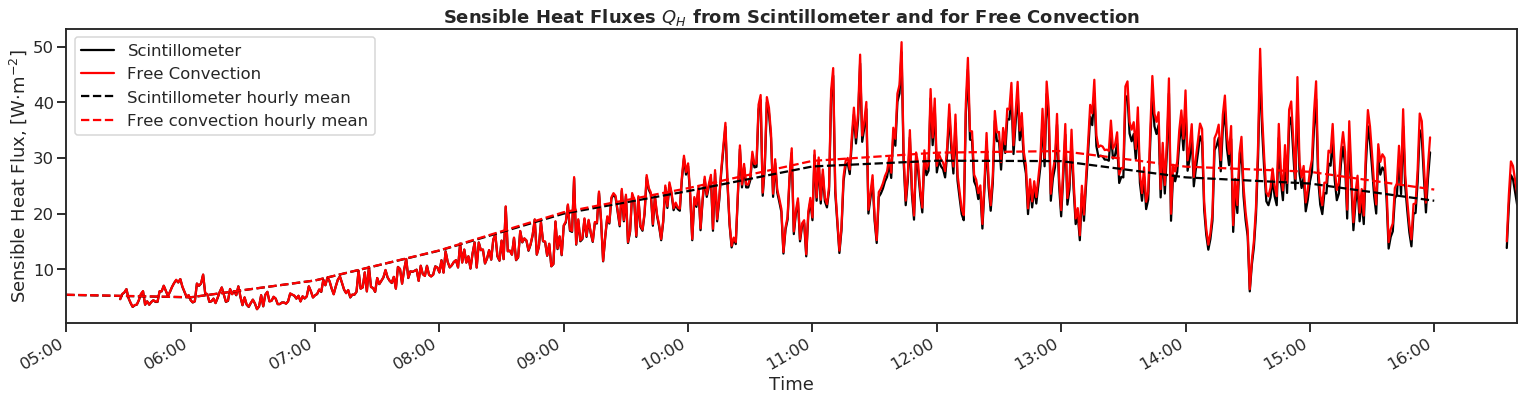

In [4]:
fig = pp.plot_free_convection(sdf, cdf)
plt.show()

In [5]:
"""Ward's iteration"""
# Takes 100s or so to run
cdf_backup = cdf  # in case of later testing
cdf = rfp.ward_method(cdf, z_eff)

/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


103.31494355201721s

Iteration completed!


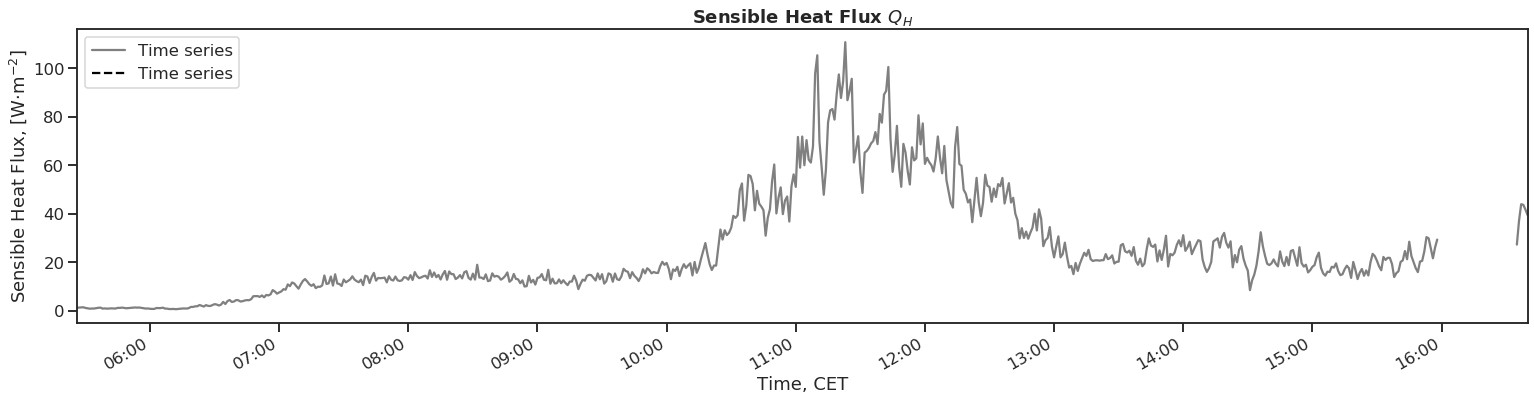

In [7]:
import importlib
importlib.reload(pp)
fig = pp.plot_generic(cdf, "shf")
plt.show()

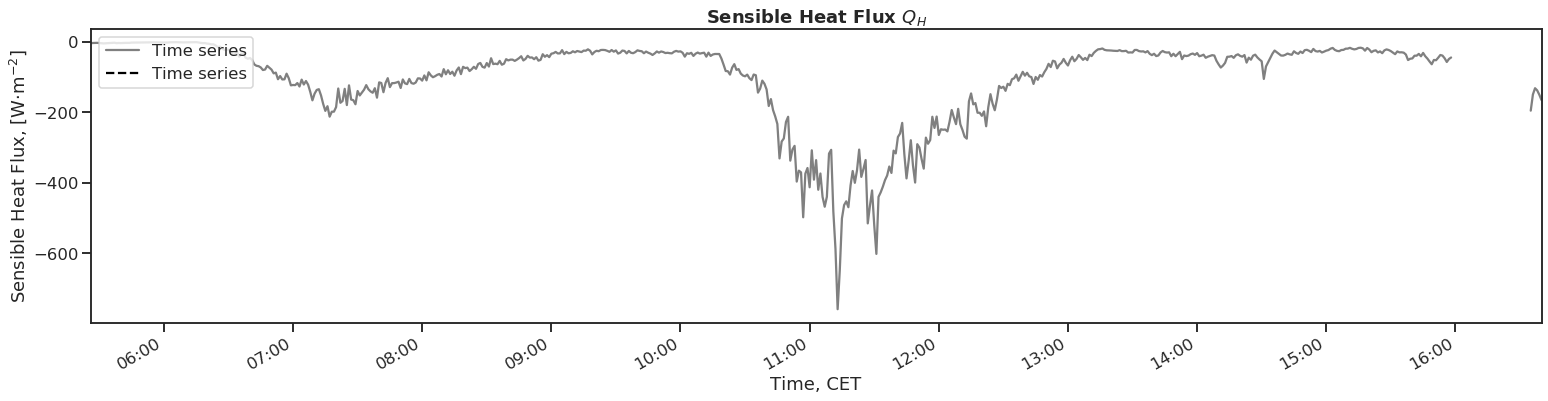

In [9]:
fig = pp.plot_generic(cdf, "l_ob")
plt.show()

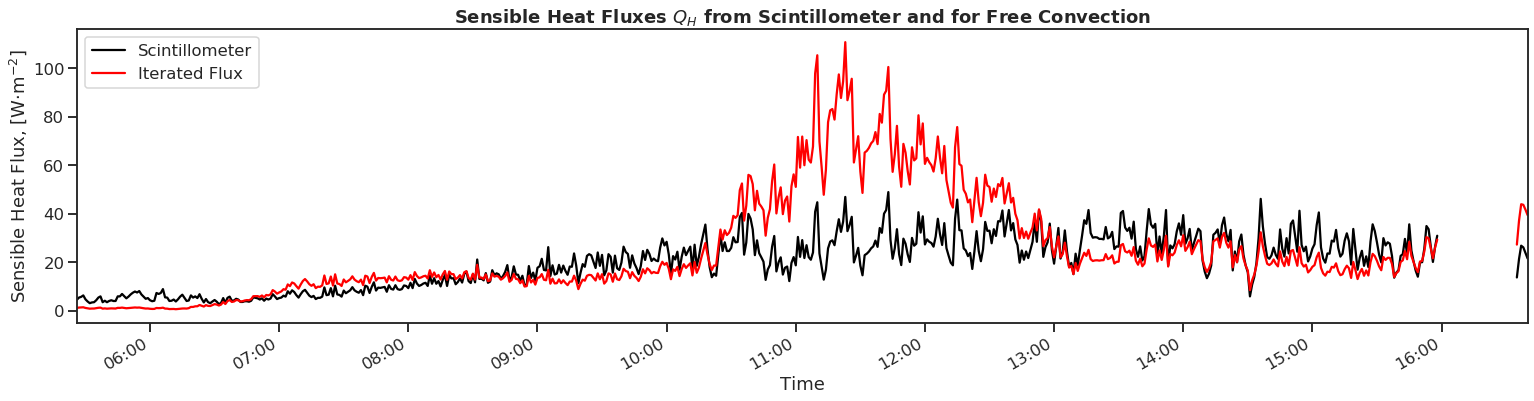

In [12]:
fig = plt.figure(figsize=(26, 6))
sdf["H_convection"].plot(color="black", label="Scintillometer")
cdf["shf"].plot(color="red", label="Iterated Flux")

plt.legend(loc="upper left")
plt.title(
    r"Sensible Heat Fluxes $Q_{H}$ from Scintillometer and from Iteration",
    fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Sensible Heat Flux, [W$\cdot$m$^{-2}$]")
ax = plt.gca()
ax.xaxis.set_major_formatter(
    dates.DateFormatter('%H:%M'))  # hours and minutes

In [28]:
"""Data overview"""
filename = "2018-05-06"
station = "schiessstand"

sdf_old = dp.scintillometer_parse(filename)
computed_data_old = cn.data_processor(filename, station)
cdf_old = computed_data_old["computed"]
z_eff_old = computed_data_old["effective_height"]

Please enter the stability conditions (stable, unstable, or other):
u
Mean path height: 31.83766108843537m
Effective path height: 25.62897860987237m


In [29]:
"""Ward's iteration"""
# Takes 100s or so to run
cdf_old_backup = cdf_old.copy()  # in case of later testing
cdf_old = rfp.ward_method(cdf_old, z_eff)

/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


106.5722484588623s

Iteration completed!


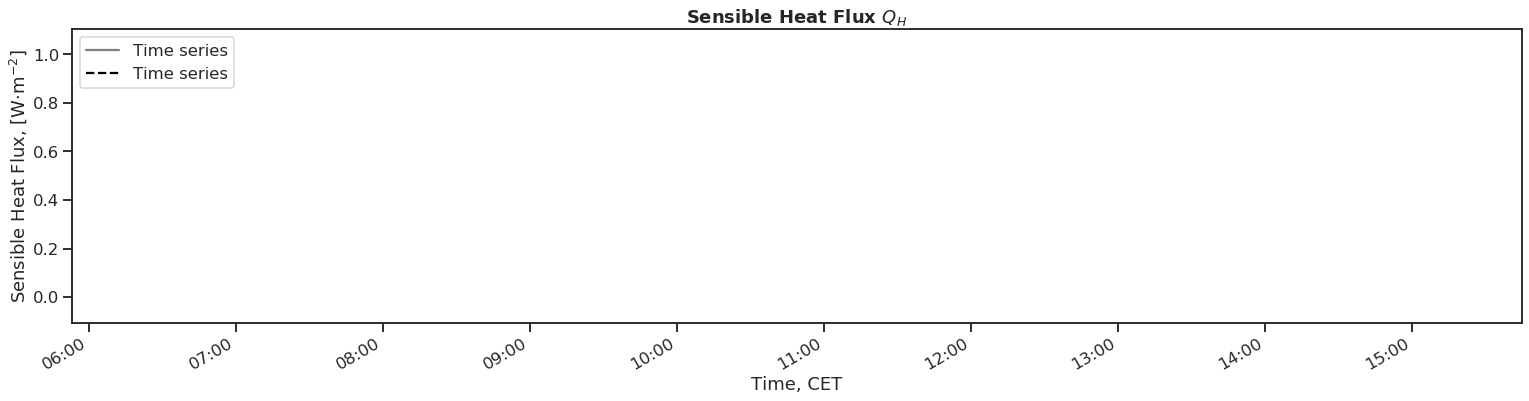

In [32]:
fig = pp.plot_generic(cdf_old_backup, "H_free")
plt.show()

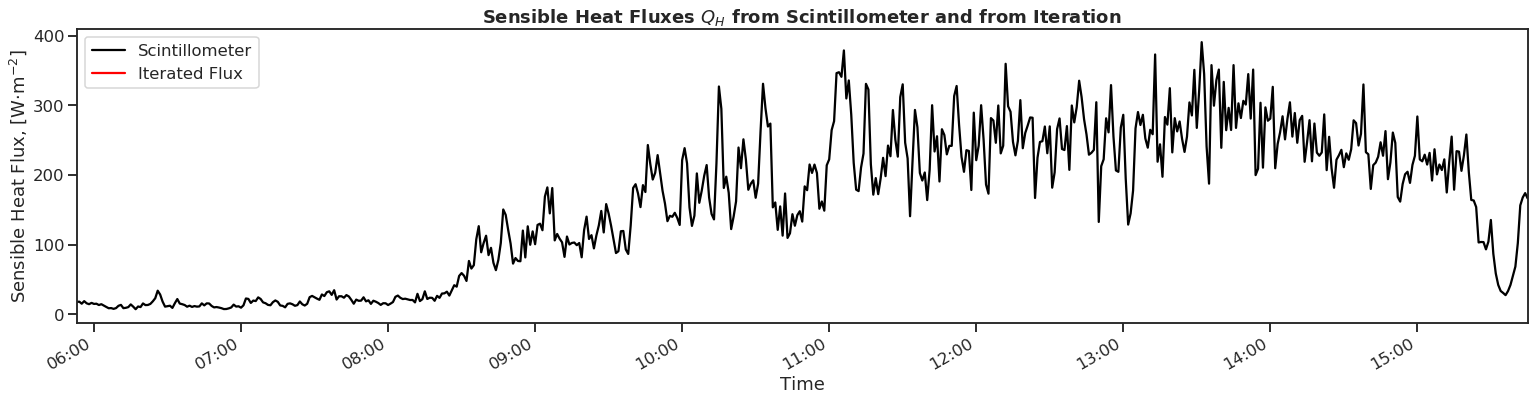

In [18]:
fig = plt.figure(figsize=(26, 6))
sdf_old["H_convection"].plot(color="black", label="Scintillometer")
cdf_old["shf"].plot(color="red", label="Iterated Flux")

plt.legend(loc="upper left")
plt.title(
    r"Sensible Heat Fluxes $Q_{H}$ from Scintillometer and from Iteration",
    fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Sensible Heat Flux, [W$\cdot$m$^{-2}$]")
ax = plt.gca()
ax.xaxis.set_major_formatter(
    dates.DateFormatter('%H:%M'))  # hours and minutes